In [114]:
#install.packages("tidyverse") # si no lo tienes
library(tidyverse)

In [3]:
data = read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/05-18-2020.csv')

Parsed with column specification:
cols(
  FIPS = col_double(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Last_Update = col_datetime(format = ""),
  Lat = col_double(),
  Long_ = col_double(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active = col_double(),
  Combined_Key = col_character()
)



In [7]:
data %>% head(5)

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
45001,Abbeville,South Carolina,US,2020-05-19 02:32:18,34.22333,-82.46171,35,0,0,35,"Abbeville, South Carolina, US"
22001,Acadia,Louisiana,US,2020-05-19 02:32:18,30.29506,-92.41420,257,12,0,245,"Acadia, Louisiana, US"
51001,Accomack,Virginia,US,2020-05-19 02:32:18,37.76707,-75.63235,690,9,0,681,"Accomack, Virginia, US"
16001,Ada,Idaho,US,2020-05-19 02:32:18,43.45266,-116.24155,780,22,0,758,"Ada, Idaho, US"
19001,Adair,Iowa,US,2020-05-19 02:32:18,41.33076,-94.47106,6,0,0,6,"Adair, Iowa, US"


In [24]:
(data 
    %>% filter(Country_Region == 'Guatemala')
    %>% group_by(Province_State)
    %>% summarise(Confirmed=sum(Confirmed),
                 Deaths=sum(Deaths),
                 Recovered=sum(Recovered),
                 Active=sum(Active))
    %>% select(Confirmed)
 ) -> plot_data

In [104]:
# orden explicito deseado
CA = c('Mexico', 'Belize', 'Guatemala', 'El Salvador', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama')
CA_factor = factor(CA, levels = CA)
(data %>% filter(Country_Region %in% CA_factor)
        %>% select(Country_Region, Confirmed, Deaths, Recovered, Active)
        %>% pivot_longer(cols=c(Confirmed,Deaths,Recovered,Active))
 )-> ca_data

In [105]:
head(ca_data, 10)

Country_Region,name,value
<chr>,<chr>,<dbl>
Belize,Confirmed,18
Belize,Deaths,2
Belize,Recovered,16
Belize,Active,0
Costa Rica,Confirmed,866
Costa Rica,Deaths,10
Costa Rica,Recovered,575
Costa Rica,Active,281
El Salvador,Confirmed,1413


In [106]:
ca_data %>% filter(value > 0) -> plot_data

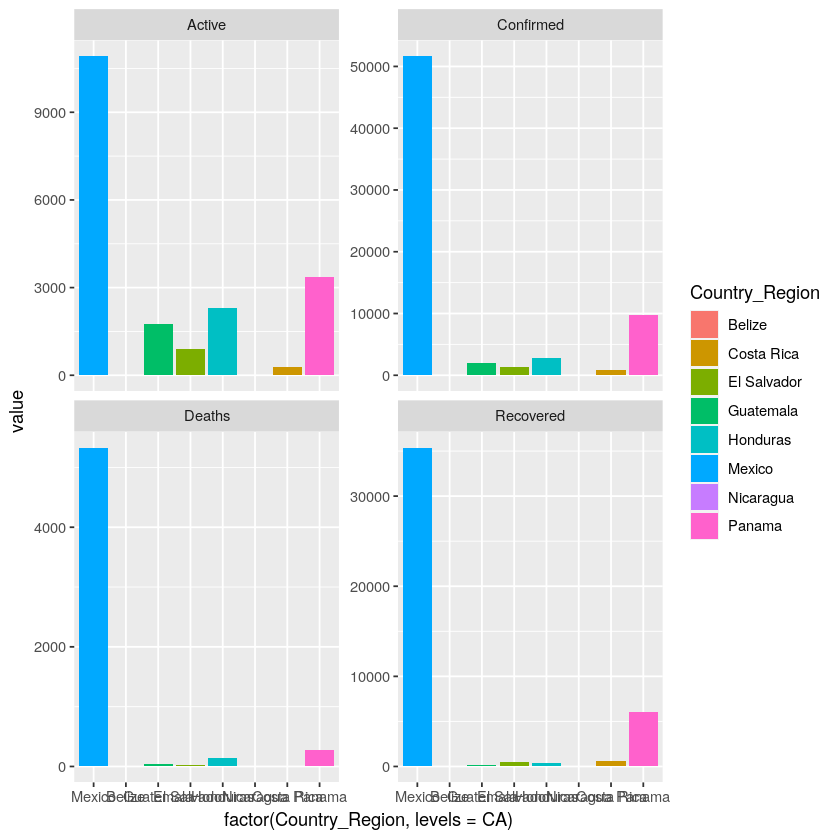

In [107]:
base_plot = (ggplot(plot_data) 
              + geom_col(aes(x=factor(Country_Region, levels = CA), # dale orden deseado
                             y=value, 
                             fill=Country_Region), # color asignado de acuerdo al pais
                         position='dodge2')
              + facet_wrap(facets = vars(name),scales = 'free_y'))

base_plot

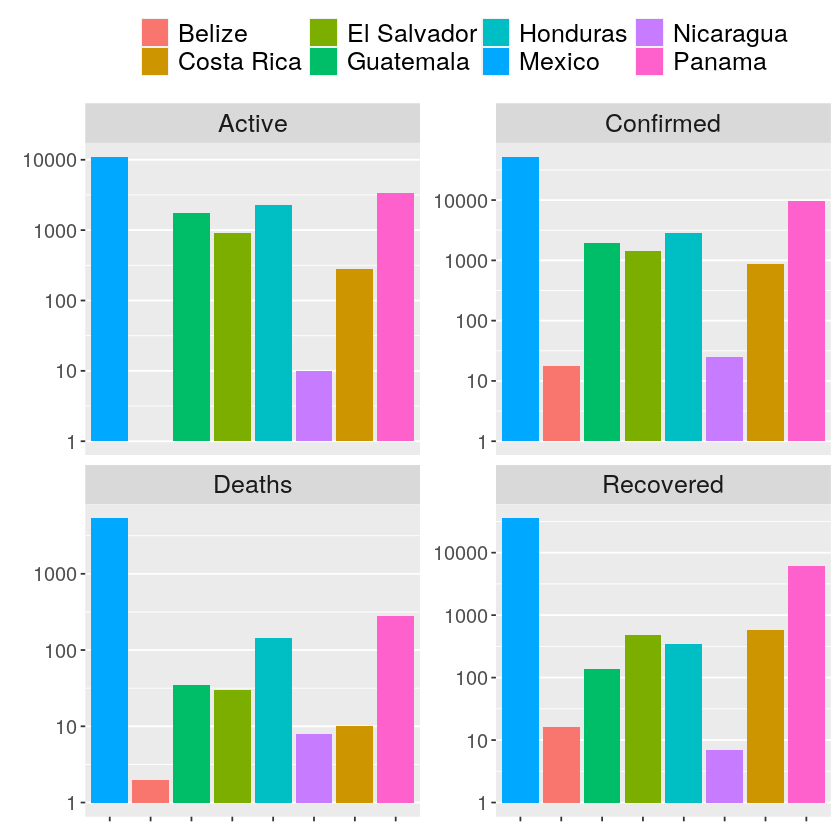

In [148]:
# ajustes. ejemplo log scale, labels
adjusted_plot = (base_plot + scale_y_log10()
        + ylab(element_blank())
        + xlab(element_blank())
        + theme(plot.title=element_text(hjust = .5, size=15),
                legend.title=element_blank(),
                panel.grid.major.x = element_blank() ,
                strip.text=element_text(size=15),
#                 legend.margin=margin(), 
#                 legend.box.margin=margin(0,0,0,0),
                axis.text.x=element_blank(),
                axis.text.y=element_text(size=12), #angle=90
                legend.text=element_text(size=15),
                legend.position="top")
)

adjusted_plot

In [123]:
#install.packages("viridis")
library(viridis)

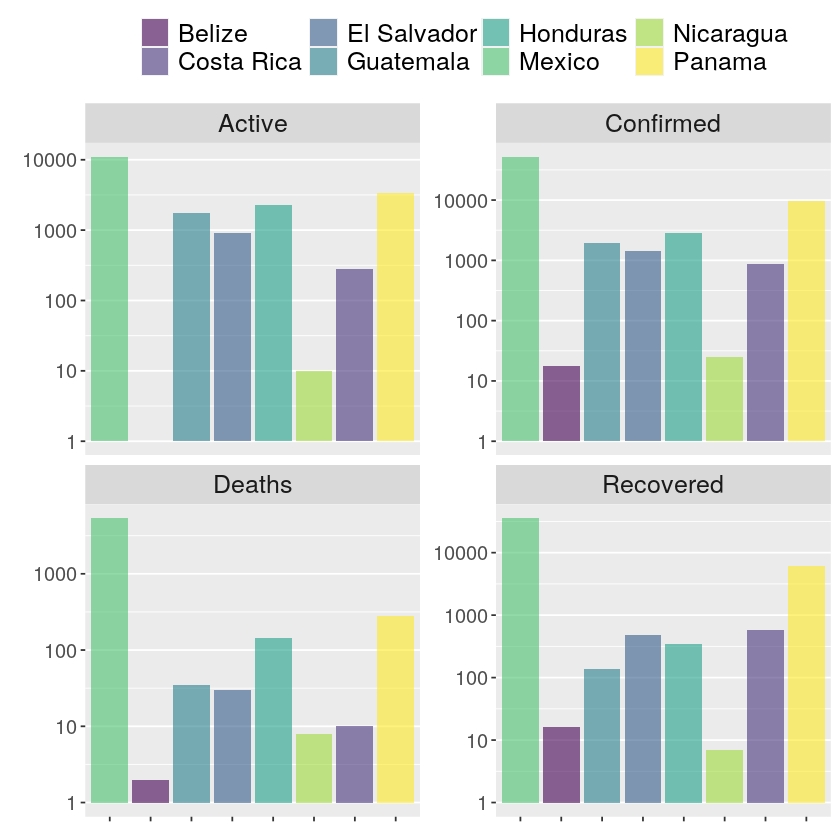

In [124]:
adjusted_plot +  scale_fill_viridis(discrete=TRUE, option = "D", alpha=.6) # cambia el color theme como en matplotlib

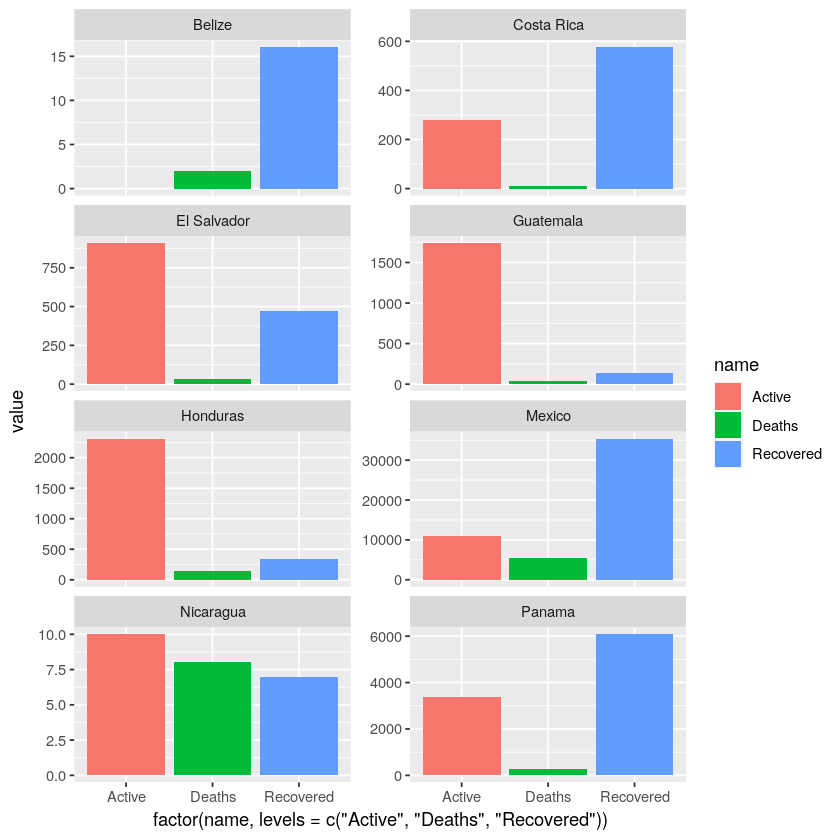

In [131]:
# o subplot por pais
base_plot2 = (ggplot(plot_data %>% filter(! name == 'Confirmed' )) 
              + geom_col(aes(x=factor(name, levels = c('Active','Deaths','Recovered')), # dale orden deseado
                             y=value, 
                             fill=name), # color asignado de acuerdo a categoria
                         position='dodge2')
              + facet_wrap(nrow = 4, ncol = 2, facets = vars(Country_Region),scales = 'free_y') #subplot de acuerdo a pais
             ) 

base_plot2

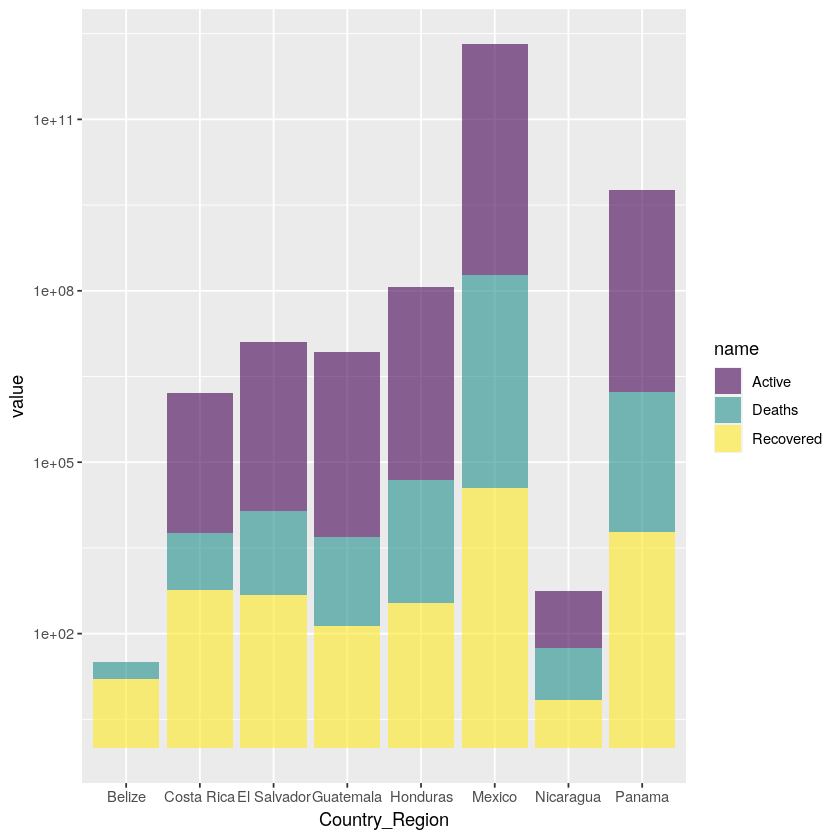

In [138]:
base_plot3 = (ggplot(plot_data %>% filter(! name == 'Confirmed' )) 
              + geom_col(aes(x=Country_Region,
                             y=value, 
                             fill=name),
                         # position='dodge2' # todo en un mismo plot, stacked 
                        )
             + scale_y_log10() 
             + scale_fill_viridis(discrete=TRUE, option = "D", alpha=.6)
)

base_plot3

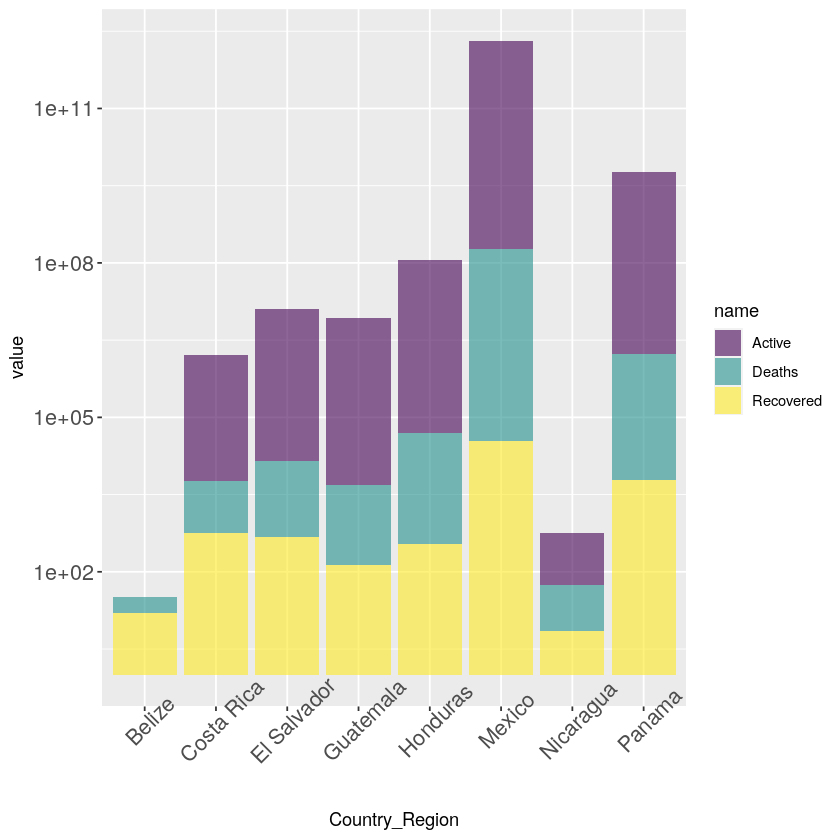

In [141]:
base_plot3 + theme(axis.text.x=element_text(size=13, angle=45),
                    axis.text.y=element_text(size=13),
                    )